In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.colors
import aacgmv2
import numpy as np
import scipy.interpolate

import asilib
import asilib.asi
import asilib.map

In [2]:
time = datetime(2022, 12, 19, 14, 3, 51)
location_codes_trex_rgb = ['Yknf']
location_codes_themis = ['inuv']
location_codes_rego = ['fsim']
map_alt = 110
min_elevation = 10

In [3]:


asi_rego=asilib.asi.rego('fsim', time=time, alt=190, custom_alt=True)


[340. 929.]


UnboundLocalError: cannot access local variable 'lower' where it is not associated with a value

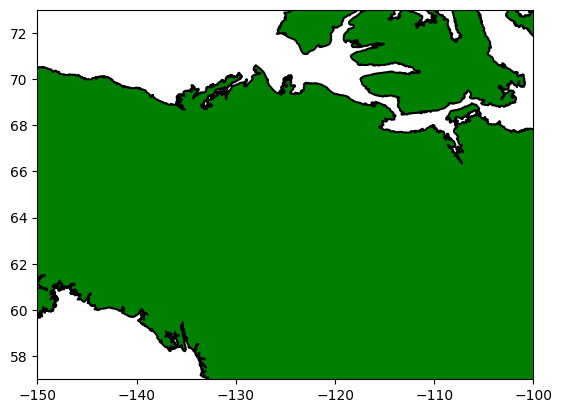

In [4]:
lon_bounds=(-150, -100)
lat_bounds=(57, 73)
ax = asilib.map.create_simple_map(lon_bounds=lon_bounds, lat_bounds=lat_bounds)
asi_rego.plot_map(ax=ax, min_elevation=30)
plt.title(f'{time} | TREx-RGB')

Text(0.5, 1.0, '2022-12-19 14:03:51 | TREx-RGB | $\\lambda_{AACGM}$ contours')

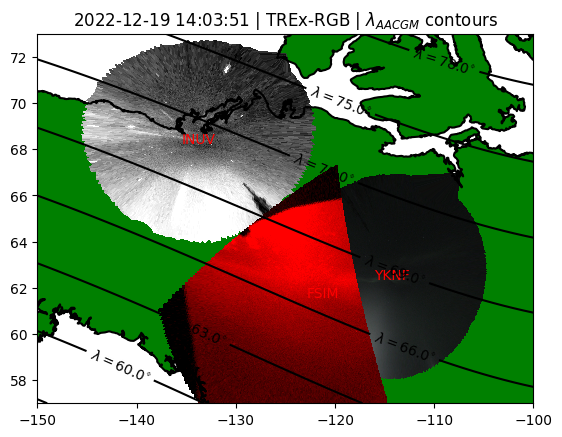

In [ ]:
lat_grid, lon_grid = np.meshgrid(np.linspace(*lat_bounds), np.linspace(*lon_bounds, num=51))
# Need to pass flattened arrays since aacgmv2 does not work with n-D arrays.
aacgm_lat_grid, aacgm_lon_grid, _ = aacgmv2.wrapper.convert_latlon_arr(
    lat_grid.flatten(), lon_grid.flatten(), 110, time, method_code='G2A'
    )
aacgm_lat_grid = aacgm_lat_grid.reshape(lat_grid.shape)
aacgm_lon_grid = aacgm_lon_grid.reshape(lon_grid.shape)

ax = asilib.map.create_simple_map(lon_bounds=lon_bounds, lat_bounds=lat_bounds)
asis.plot_map(ax=ax, overlap=False, min_elevation=min_elevation)
cs = plt.contour(lon_grid, lat_grid, aacgm_lat_grid, colors='k')
ax.clabel(cs, inline=True, fontsize=10, fmt=lambda x: f'$\lambda = {{{x}}}^{{\circ}}$')
plt.title(f'{time} | TREx-RGB | $\lambda_{{AACGM}}$ contours')